<a href="https://colab.research.google.com/github/thogeti/ALMLPract/blob/master/ComVisionImageDenoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the necessary Libraries
The first step is to load the necessary Python libraries. We will import libraries such as numpy for optimizing the matrix multiplications, matplotlib for data visualization purposes such as plotting the images, Sequential model from Keras gives us an empty box in which we are adding several dense (i.e, fully connected) layers according to our architecture, Dense to create the fully connected layers in our network, MNIST to import the dataset from Keras directly.

In [1]:
import numpy 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

Load Dataset in Numpy Format
In this article, we will be using the MNIST dataset, which is a simple computer vision dataset. It consists of images of handwritten digits in the form of a greyscale. It also includes labels for each image, telling us which digit it is (i.e, output for each image). It means we have a labelled data in our hands to work with. Each image in the MNIST dataset is 28 pixels by 28 pixels.

Let’s see some of the images from the MNIST dataset:

Dataset | Image Denoising using AutoEncoders

We will split our MNIST data into two parts:

Training Dataset: 60,000 data points belong to the training dataset, and
Testing Dataset: 10,000 data points belongs to the test dataset.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

Plot Images as a Grey Scale Image
Now, upto the above sections, we will load the complete dataset, and also divide it into training and testing sets. So, in this section, we will plot some of the images from our dataset using the matplotlib library, and specifically, we are using the subplot function of the matplotlib library to plot more than one image simultaneously.

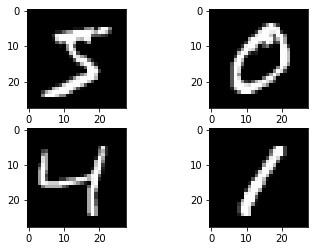

In [5]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

Formatting Data for Keras
We can flatten the 2-D array of images into a vector of 28×28=784 numbers. It is irrespective of how we flatten the array, as long as we’re consistent between images. From this perspective, the MNIST images are just a bunch of points in a vector space of 784-dimensional. But the data should always be of the format “(Number of data points, data point dimension)”. In this case, the training data will be of format 60,000×784.

In [6]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255

Adding Noise to Images
While solving the problem statement, we have to remember our goal which is to make a model that is capable of performing noise removal on images. To be able to do this, we will use existing images and add them to random noise. Here we will feed the original images as input and we get the noisy images as output and our model (i.e, autoencoder) will learn the relationship between a clean image and a noisy image and learn how to clean a noisy image. So let’s create a noisy version of our MNIST dataset and give it as input to the decoder network.

We start with defining a noise factor which is a hyperparameter. The noise factor is multiplied with a random matrix that has a mean of 0.0 and a standard deviation of 1.0. This matrix will draw samples from a normal (Gaussian) distribution. While adding the noise, we have to remember that the shape of the random normal array will be similar to the shape of the data you will be adding the noise.

In [8]:
noise_factor = 0.2
x_train_noisy = X_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

Defining an Encoder-Decoder network
It will have an input layer of 784 neurons since we have an image size of 784 due to 28 by 28 pixels present (i.e. we have the input dimension and an output layer of 784 neurons).

In [9]:
# create model
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

**Compiling the model**
Once the model is defined, we have to compile it. While compiling we provide the loss function to be used, the optimizer, and any metric. For our problem statement, we will use an Adam optimizer and Mean Squared Error for our model.

In [10]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

**Training or Fitting the model**
Now the model is ready to be trained. We will provide training data to the network. Also, we will specify the validation data, over which the model will only be validated.

In [11]:
# Training model
model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=2, batch_size=200)

Epoch 1/2
300/300 [==============================] - 27s 41ms/step - loss: 0.0689 - val_loss: 0.0203
Epoch 2/2
300/300 [==============================] - 12s 40ms/step - loss: 0.0185 - val_loss: 0.0138


**Evaluating the model**
Finally, we will evaluate our trained model on the testing dataset, which we have created in the above section of loading our dataset. 

In [12]:
# Final evaluation of the model
pred = model.predict(x_test_noisy)
pred.shape

(10000, 784)

Test Images


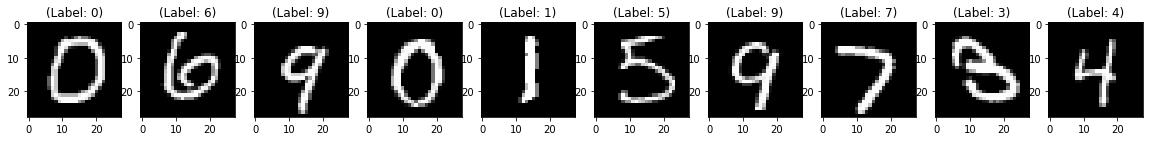

Test Images with Noise


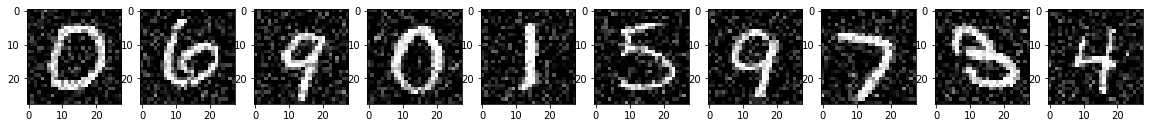

Reconstruction of Noisy Test Images


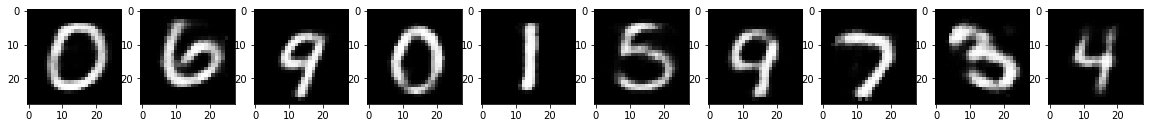

In [13]:
X_test = numpy.reshape(X_test, (10000,28,28)) *255
pred = numpy.reshape(pred, (10000,28,28)) *255
x_test_noisy = numpy.reshape(x_test_noisy, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i,:,:], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()

f we want to summarize the whole process in one image, the image below is the best for that.

Summarize | Image Denoising using AutoEncoders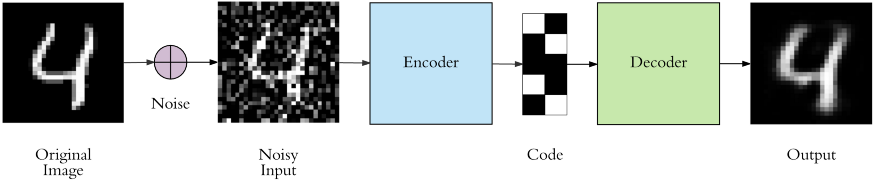